## Panorama (Image Stitching Using SIFT & RANSAC)

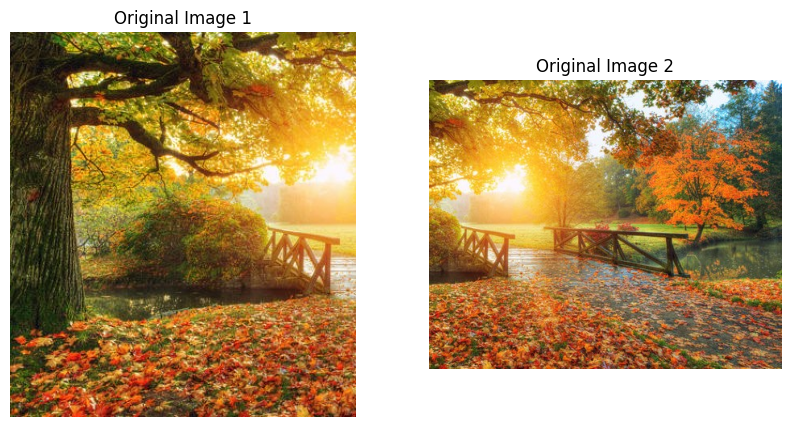

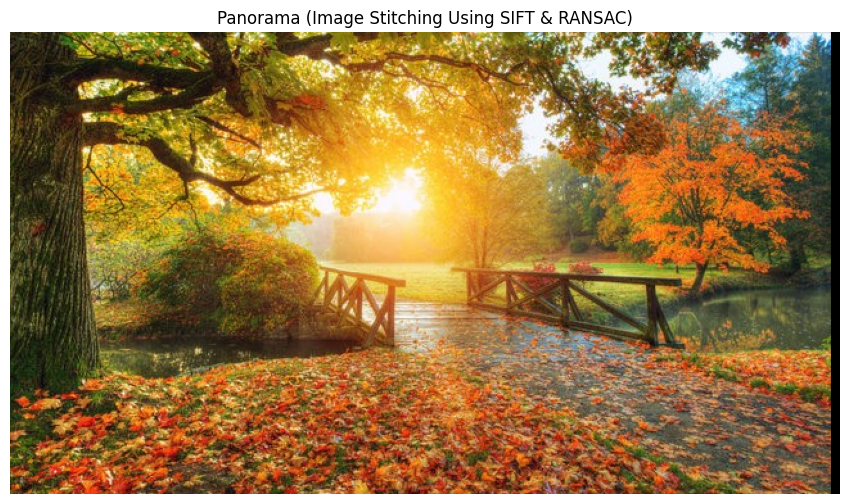

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('/content/p2.jpg')  # Left Image
img2 = cv2.imread('/content/p3.jpg')  # Right Image

# Display Original Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Original Image 2")
plt.axis("off")
plt.show()

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Use FLANN-based matcher
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

# Apply RANSAC to find Homography
if len(pts1) >= 4:
    H, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC, 5.0)

    # Warp the second image onto the first
    height, width, channels = img1.shape
    result = cv2.warpPerspective(img2, H, (width * 2, height))

    # Place img1 in the panorama
    result[0:height, 0:width] = img1

    # Convert BGR to RGB for display
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


    # Display the panorama
    plt.figure(figsize=(12, 6))
    plt.imshow(result_rgb)
    plt.axis("off")
    plt.title("Panorama (Image Stitching Using SIFT & RANSAC)")
    plt.show()
else:
    print("Not enough matches to create a panorama.")
